# Credit Card Fraud Detection with Gradient Boosting

**Gradient boosting**

*Gradient boosting* is a popular machine learning technique used for both regression and classification tasks. It is an ensemble learning method that combines the predictions of several weak learners (typically decision trees) to create a strong predictive model. The main idea behind gradient boosting is to sequentially train new models that predict the residuals or errors made by the previous models

In [2]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load data
data = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

In [4]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ('model', HistGradientBoostingClassifier(random_state=42))
])

In [7]:
# Define hyperparameters for tuning
param_grid = {
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_iter': [100, 200, 300],
    'model__max_depth': [3, 5, 7]
}


In [8]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        HistGradientBoostingClassifier(random_state=42))]),
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__max_iter': [100, 200, 300]},
             scoring='accuracy')

In [9]:
# Get best model from grid search
best_model = grid_search.best_estimator_

In [10]:
# Make predictions on test data
y_pred = best_model.predict(X_test)

In [11]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [15]:
# Print evaluation metrics
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.9996922427589118
Confusion Matrix:
 [[56731    19]
 [   16 56960]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



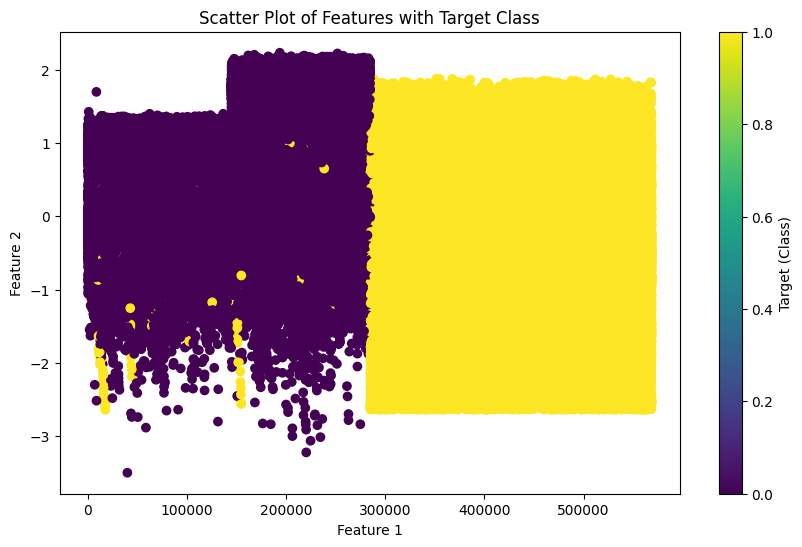

In [13]:
# Visualize data (example)
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Target (Class)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features with Target Class')
plt.show()